In [54]:
import pandas as pd

In [55]:
train = pd.read_csv(r"C:\Users\Administrator\Downloads\playground-series-s5e2\training_extra.csv")
train1 = pd.read_csv(r"C:\Users\Administrator\Downloads\playground-series-s5e2\train.csv")
test = pd.read_csv(r"C:\Users\Administrator\Downloads\playground-series-s5e2\test.csv")
testids = test['id']

In [56]:
train1.tail(10)

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
299990,299990,Nike,Polyester,Medium,4.0,No,No,Tote,Gray,8.493494,37.66645
299991,299991,NaN,Polyester,Large,7.0,No,No,Messenger,Red,27.897502,138.70658
299992,299992,Adidas,Polyester,Small,10.0,Yes,No,Messenger,Gray,9.559935,96.90682
299993,299993,Nike,Leather,Large,9.0,No,Yes,Tote,Red,28.910825,142.29540
299994,299994,Under Armour,Nylon,Large,4.0,Yes,No,Messenger,Green,20.392117,113.59984
299995,299995,Adidas,Leather,Small,9.0,No,No,Tote,Blue,12.730812,129.99749
299996,299996,Jansport,Leather,Large,6.0,No,Yes,Tote,Blue,26.633182,19.85819
299997,299997,Puma,Canvas,Large,9.0,Yes,Yes,Backpack,Pink,11.898250,111.41364
299998,299998,Adidas,Nylon,Small,1.0,No,Yes,Tote,Pink,6.175738,115.89080
299999,299999,Under Armour,Canvas,Small,2.0,No,Yes,Backpack,Black,18.568865,26.72762


In [57]:
data = pd.concat([train, train1], ignore_index=True)

In [58]:
data.shape

(3994318, 11)

In [59]:
null_values = data.isnull().sum()
print(null_values)

id                           0
Brand                   126758
Material                110962
Size                     87785
Compartments                 0
Laptop Compartment       98533
Waterproof               94324
Style                   104180
Color                   133617
Weight Capacity (kg)      1808
Price                        0
dtype: int64


In [60]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for null values
null_values = data.isnull().sum()
print("Null values in each column:")
print(null_values)

Number of duplicate rows: 0
Null values in each column:
id                           0
Brand                   126758
Material                110962
Size                     87785
Compartments                 0
Laptop Compartment       98533
Waterproof               94324
Style                   104180
Color                   133617
Weight Capacity (kg)      1808
Price                        0
dtype: int64


In [61]:
data.dropna(inplace=True)

In [62]:
data.shape

(3288503, 11)

In [63]:
null_values = data.isnull().sum()
print(null_values)

id                      0
Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64


In [64]:
data.drop(columns=['id'], inplace=True)

In [65]:
data.describe()

,Compartments,Weight Capacity (kg),Price
count,3.288503e+06,3.288503e+06,3.288503e+06
mean,5.441262e+00,1.799719e+01,8.149096e+01
std,2.888815e+00,6.967921e+00,3.882212e+01
min,1.000000e+00,5.000000e+00,1.500000e+01
25%,3.000000e+00,1.205773e+01,4.780518e+01
50%,5.000000e+00,1.802650e+01,8.117528e+01
75%,8.000000e+00,2.397621e+01,1.148033e+02
max,1.000000e+01,3.000000e+01,1.500000e+02


In [66]:
unique_counts = data.nunique()
print(unique_counts)

Brand                         5
Material                      4
Size                          3
Compartments                 10
Laptop Compartment            2
Waterproof                    2
Style                         3
Color                         6
Weight Capacity (kg)    1582006
Price                     48358
dtype: int64


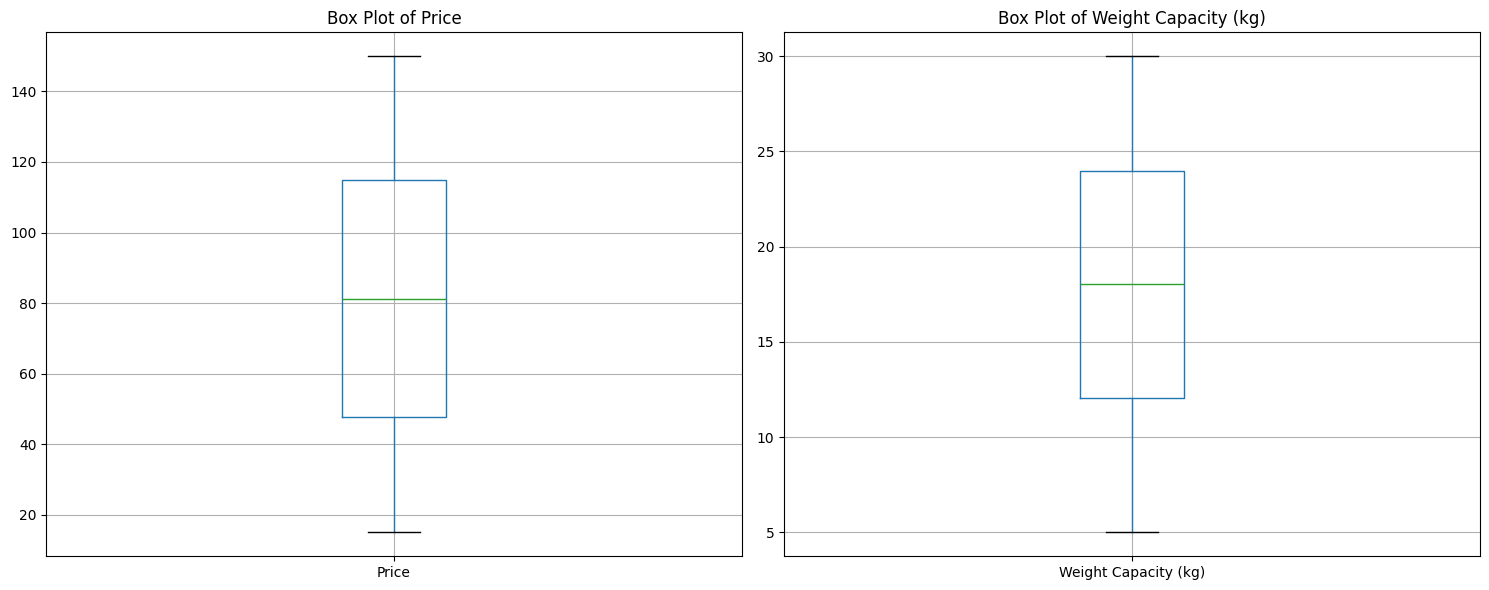

In [67]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box plot for Price
data.boxplot(column='Price', ax=axes[0])
axes[0].set_title('Box Plot of Price')

# Box plot for Weight Capacity (kg)
data.boxplot(column='Weight Capacity (kg)', ax=axes[1])
axes[1].set_title('Box Plot of Weight Capacity (kg)')

# Show the plots
plt.tight_layout()
plt.show()

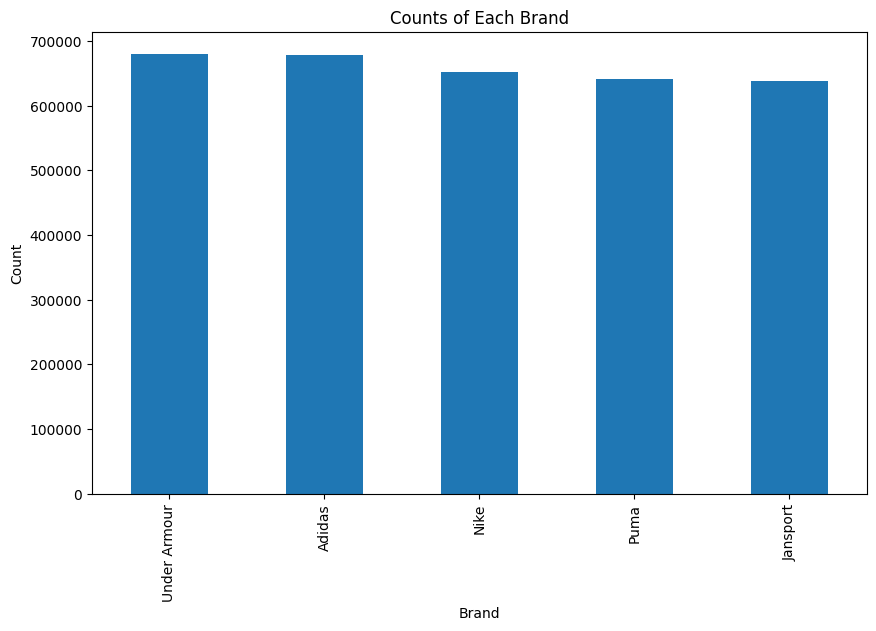

In [68]:
import matplotlib.pyplot as plt

# Get the counts of each brand
brand_counts = data['Brand'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
brand_counts.plot(kind='bar')
plt.title('Counts of Each Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

In [69]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Convert categorical columns to numerical values
for col in ["Brand", "Material", "Size", "Style", "Color", "Waterproof", "Laptop Compartment"]:
    data[col] = le.fit_transform(data[col])

data.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,4,0,2,10.0,1,1,2,1,23.882052,114.11068
1,3,3,2,4.0,0,1,0,3,11.869095,129.74972
2,1,3,2,8.0,1,1,2,5,8.092302,21.37370
3,2,2,0,7.0,0,0,1,4,7.719581,48.09209
4,2,1,0,9.0,0,1,2,3,22.741826,77.32461


In [71]:
data.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,4,0,2,10.0,1,1,2,1,23.882052,114.11068
1,3,3,2,4.0,0,1,0,3,11.869095,129.74972
2,1,3,2,8.0,1,1,2,5,8.092302,21.37370
3,2,2,0,7.0,0,0,1,4,7.719581,48.09209
4,2,1,0,9.0,0,1,2,3,22.741826,77.32461


In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X = data.drop(columns=['Price'])
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)




In [84]:
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1628.0932661823315


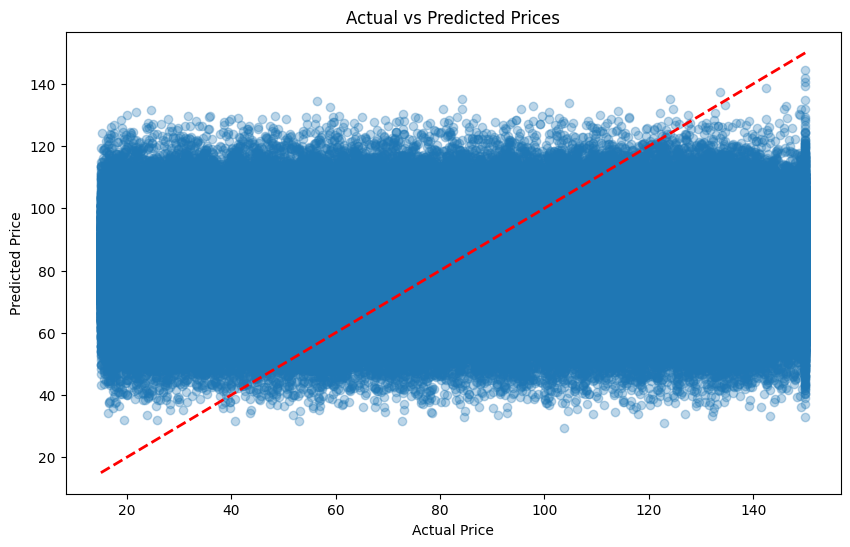

In [73]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

In [78]:
null_values_test = test.isnull().sum()
print(null_values_test)

Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
dtype: int64


In [75]:
test.drop(columns=['id'], inplace=True)

In [77]:
# Fill null values for categorical columns with mode
categorical_columns = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
for col in categorical_columns:
    test[col].fillna(test[col].mode()[0], inplace=True)

# Fill null values for 'Weight Capacity (kg)' column with mean
test['Weight Capacity (kg)'].fillna(test['Weight Capacity (kg)'].mean(), inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4596\2125980801.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test[col].fillna(test[col].mode()[0], inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4596\2125980801.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [80]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Convert categorical columns to numerical values
for col in ["Brand", "Material", "Size", "Style", "Color", "Waterproof", "Laptop Compartment"]:
    test[col] = le.fit_transform(test[col])

test.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,3,1,2,2.0,0,0,2,3,20.671147
1,2,0,1,7.0,0,1,0,3,13.564105
2,0,0,0,9.0,0,1,1,1,11.809799
3,0,2,0,1.0,1,0,1,3,18.477036
4,0,2,0,2.0,1,1,2,0,9.907953


In [81]:
submission_preds = rf_model.predict(test)
print(submission_preds)

[96.6676344 76.7150368 96.6438906 ... 41.9104845 83.8898529 81.8114271]


In [82]:
df = pd.DataFrame({"id": testids.values,
                   "Price": submission_preds,
                  })

In [83]:
df.to_csv(r"C:\Users\Administrator\Downloads\submission.csv", index=False)